# Feature Importance

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("mobile_price_train_data.csv")

In [3]:
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,742,0,2.2,1,4,0,56,0.2,190,...,577,1359,3557,16,11,12,0,1,1,3
1,1,1509,0,0.6,1,5,0,50,0.3,81,...,1010,1684,1540,12,8,3,1,1,0,1
2,2,641,1,1.1,0,0,1,7,0.9,192,...,417,759,3595,7,5,19,1,1,1,2
3,3,733,1,0.6,1,0,0,63,0.3,105,...,950,1739,984,17,4,9,1,0,1,0
4,4,1414,0,0.5,0,0,1,15,0.8,168,...,294,1233,1069,18,6,14,1,0,0,0


In [4]:
X = data.iloc[:,0:20]
Y = data.iloc[:,-1]

In [5]:
X

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen
0,0,742,0,2.2,1,4,0,56,0.2,190,7,14,577,1359,3557,16,11,12,0,1
1,1,1509,0,0.6,1,5,0,50,0.3,81,4,8,1010,1684,1540,12,8,3,1,1
2,2,641,1,1.1,0,0,1,7,0.9,192,1,3,417,759,3595,7,5,19,1,1
3,3,733,1,0.6,1,0,0,63,0.3,105,7,10,950,1739,984,17,4,9,1,0
4,4,1414,0,0.5,0,0,1,15,0.8,168,2,0,294,1233,1069,18,6,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1795,667,1,0.6,0,6,1,3,0.7,185,6,13,13,1463,2855,5,0,19,1,0
1796,1796,1595,1,2.6,0,7,0,12,0.3,121,8,19,344,655,3608,15,1,16,0,1
1797,1797,1641,0,1.1,0,6,0,48,0.7,97,8,7,224,1994,1695,13,6,17,1,0
1798,1798,1913,1,1.8,0,0,0,29,0.6,111,5,4,675,742,2023,17,13,8,1,1


In [6]:
Y

0       3
1       1
2       2
3       0
4       0
       ..
1795    2
1796    3
1797    2
1798    2
1799    3
Name: price_range, Length: 1800, dtype: int64

In [7]:
model = RandomForestClassifier()

In [8]:
model.fit(X,Y)

RandomForestClassifier()

In [9]:
model.feature_importances_

array([0.03656876, 0.07298315, 0.00563015, 0.02429156, 0.00658069,
       0.02332376, 0.00552341, 0.03476785, 0.02220825, 0.03500292,
       0.01988508, 0.02673703, 0.05389858, 0.05573761, 0.48953358,
       0.0242081 , 0.02582148, 0.02677203, 0.00461829, 0.0059077 ])

In [11]:
feature_importance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])

In [14]:
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [15]:
feature_importance

,Importance
ram,0.489534
battery_power,0.072983
px_width,0.055738
px_height,0.053899
id,0.036569
mobile_wt,0.035003
int_memory,0.034768
talk_time,0.026772
pc,0.026737
sc_w,0.025821


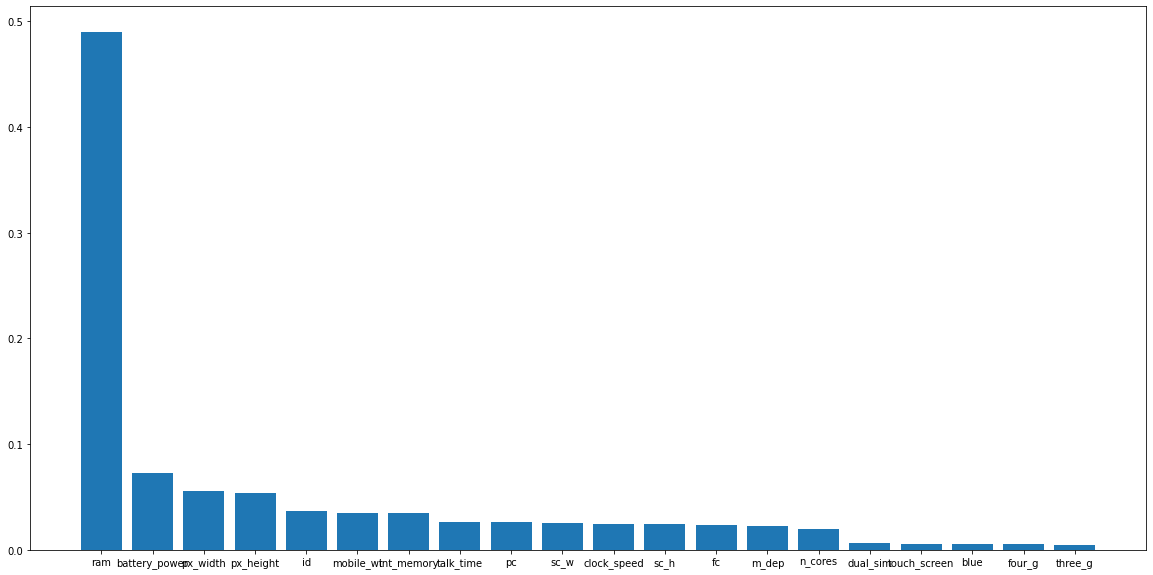

In [23]:
#ploting the bargraph
plt.figure(figsize=(20,10))
plt.bar(feature_importance.index, feature_importance['Importance'])
plt.show()

# Correlation matrix

In [25]:
data_corr = data.corr()
data_corr

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
id,1.000000,-0.023441,-0.000320,-0.037606,-0.007266,-0.018945,-0.021321,0.005467,-0.031294,-0.027617,...,0.023871,0.013728,-0.048260,-0.006739,-0.017610,0.009791,-0.000253,0.034766,0.022442,-0.043033
battery_power,-0.023441,1.000000,0.003214,0.016093,-0.040128,0.030667,0.029040,-0.005493,0.031306,-0.001848,...,0.009568,-0.010103,-0.010150,-0.030234,-0.020708,0.050636,0.018261,-0.011101,-0.006790,0.191592
blue,-0.000320,0.003214,1.000000,0.029854,0.031260,-0.000072,0.017081,0.022202,-0.002768,-0.002471,...,-0.013560,-0.046058,0.026209,-0.013336,-0.003448,0.010243,-0.022556,0.011145,-0.009868,0.020918
clock_speed,-0.037606,0.016093,0.029854,1.000000,0.002126,-0.000187,-0.041441,0.019138,-0.005666,0.004028,...,-0.016201,0.002238,0.009655,-0.024115,0.000794,-0.021295,-0.057526,0.020924,-0.034434,0.001591
dual_sim,-0.007266,-0.040128,0.031260,0.002126,1.000000,-0.030144,-0.001690,-0.015282,-0.031857,-0.017814,...,-0.031362,-0.000726,0.033251,-0.011905,-0.026196,-0.039277,-0.014149,-0.028940,0.025368,0.007833
fc,-0.018945,0.030667,-0.000072,-0.000187,-0.030144,1.000000,-0.025548,-0.026670,-0.003306,0.023238,...,-0.015418,-0.003823,0.018634,-0.007751,-0.008107,-0.004134,-0.000286,-0.010966,0.015176,0.026308
four_g,-0.021321,0.029040,0.017081,-0.041441,-0.001690,-0.025548,1.000000,0.016100,0.003967,-0.009339,...,-0.025081,0.010449,0.007875,0.019353,0.036568,-0.045888,0.580443,0.018771,-0.022776,0.016092
int_memory,0.005467,-0.005493,0.022202,0.019138,-0.015282,-0.026670,0.016100,1.000000,-0.001654,-0.032043,...,0.004567,-0.008983,0.036269,0.026691,0.008235,-0.010143,-0.002291,-0.029297,0.023591,0.047993
m_dep,-0.031294,0.031306,-0.002768,-0.005666,-0.031857,-0.003306,0.003967,-0.001654,1.000000,0.034048,...,0.033650,0.023847,-0.014071,-0.035281,-0.026618,0.013933,-0.002711,-0.007912,-0.019167,-0.002572
mobile_wt,-0.027617,-0.001848,-0.002471,0.004028,-0.017814,0.023238,-0.009339,-0.032043,0.034048,1.000000,...,0.010124,0.010014,0.003199,-0.036216,-0.023584,0.001634,0.009803,-0.005237,-0.003518,-0.024938


In [27]:
import seaborn as sns

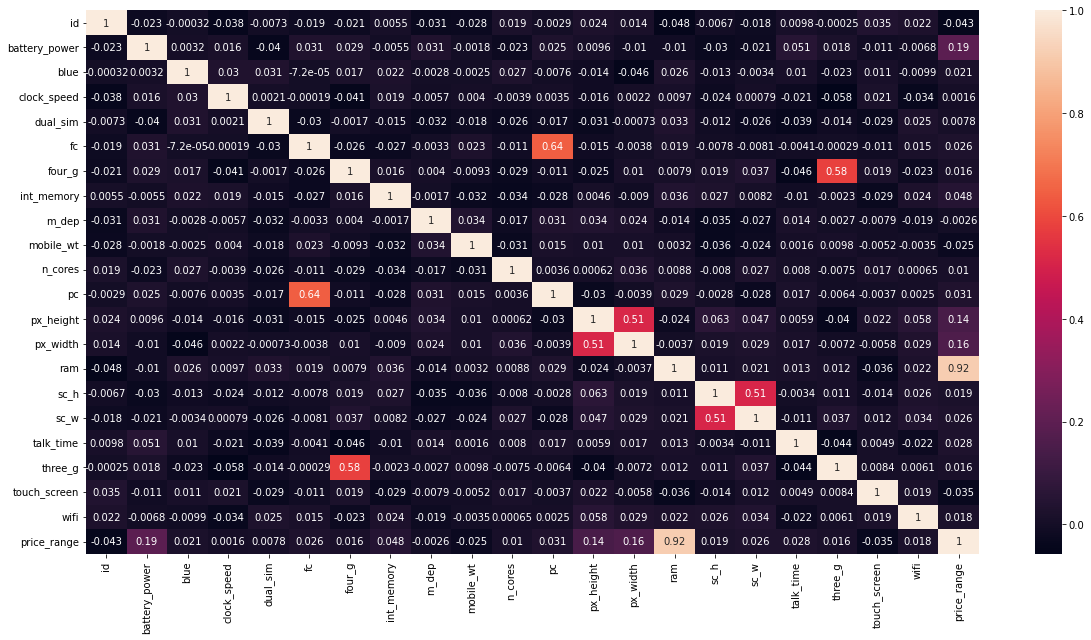

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(data_corr, annot=True)
plt.show()